# Thompson Sampling

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [6]:
import random

N = 10000
d = 10

ads_selected = []                       # List to store the indices of selected ads
numbers_of_rewards_1 = [0] * d          # List to keep track of the number of rewards 1 for each ad
numbers_of_rewards_0 = [0] * d          # List to keep track of the number of rewards 0 for each ad
total_reward = 0                         # Variable to store the cumulative reward

for n in range(0, N):                    # Iterate for N rounds
    ad = 0                               # Index of the selected ad
    max_random = 0                       # Maximum random value observed so far

    for i in range(0, d):                # Iterate over each available ad
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # Generate a random value from a beta distribution based on the reward counts

        if (random_beta > max_random):   # If the generated random value is greater than the current maximum
            max_random = random_beta     # Update the maximum random value
            ad = i                       # Update the index of the selected ad

    ads_selected.append(ad)              # Add the index of the selected ad to the ads_selected list

    reward = dataset.values[n, ad]        # Get the reward for the selected ad from the dataset

    if reward == 1:                       # If the reward is 1
        numbers_of_rewards_1[ad] += 1     # Update the count of rewards 1 for the selected ad
    else:
        numbers_of_rewards_0[ad] += 1     # Update the count of rewards 0 for the selected ad

    total_reward += reward                # Add the obtained reward to the cumulative reward


## Visualising the results - Histogram

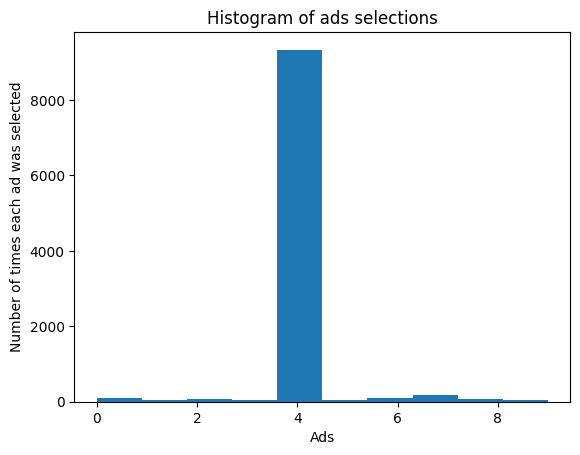

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()